# **NAGALAND RAINFALL TREND ANALYSIS**

Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### INSTALLING NECESSARY LIBRARIES

In [ ]:
!pip install geopandas

In [ ]:
!pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 6.3 MB/s eta 0:00:00


In [ ]:
!pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512574 sha256=f8f80a97505e64d166f162442588b7282f7f4d14ab28775127cf95f43bffc235
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
!pip install pymannkendall

In [ ]:
!pip install pyhomogeneity

In [ ]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

import pyproj
from shapely.geometry import Point

import pandas as pd

from fastdtw import fastdtw

from scipy.stats import kendalltau, norm, linregress, zscore

import pyhomogeneity as hg

### IMPLEMENTATION

IMPORTING INDIAN METEROLOGICAL DEPARTMENT (IMD) RAINFALL DATASETS 2022 TO 1901

In [ ]:
data_path = '/content/drive/MyDrive/ColabNotebooks/IMD-FINAL-YEAR-PROJECT/Rainfall-dataset-2022to1901/'

In [ ]:
rainfall_data_2001 = xr.open_dataset(data_path + '2001.nc')
print(rainfall_data_2001.head())

<xarray.Dataset>
Dimensions:    (LONGITUDE: 5, LATITUDE: 5, TIME: 5)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 67.5 68.5 69.5 70.5
  * LATITUDE   (LATITUDE) float64 6.5 7.5 8.5 9.5 10.5
  * TIME       (TIME) datetime64[ns] 2001-01-01 2001-01-02 ... 2001-01-05
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 ...
Attributes:
    history:      FERRET V7.5 (optimized) 28-Mar-22
    Conventions:  CF-1.6


PRINTING THE LATITUDNAL AND LONGITUDNAL RANGE OF THE RAINFALL DATASETS

In [ ]:
# Access the longitude and latitude coordinates from the dataset
longitude_values = rainfall_data_2001['LONGITUDE'].values
latitude_values = rainfall_data_2001['LATITUDE'].values

# Find the minimum and maximum values for longitude and latitude
min_longitude = longitude_values.min()
max_longitude = longitude_values.max()
min_latitude = latitude_values.min()
max_latitude = latitude_values.max()

# Print the range of longitude and latitude
print(f"Longitude Range: ({min_longitude}, {max_longitude})")
print(f"Latitude Range: ({min_latitude}, {max_latitude})")

Longitude Range: (66.5, 100.5)
Latitude Range: (6.5, 38.5)


In [ ]:
print(f"Latitude values: {latitude_values}", "\n")

print(f"Longitude values: {longitude_values}")

Latitude values: [ 6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5 14.5 15.5 16.5 17.5 18.5 19.5
 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5 28.5 29.5 30.5 31.5 32.5 33.5
 34.5 35.5 36.5 37.5 38.5] 

Longitude values: [ 66.5  67.5  68.5  69.5  70.5  71.5  72.5  73.5  74.5  75.5  76.5  77.5
  78.5  79.5  80.5  81.5  82.5  83.5  84.5  85.5  86.5  87.5  88.5  89.5
  90.5  91.5  92.5  93.5  94.5  95.5  96.5  97.5  98.5  99.5 100.5]


IMPORTING THE SHAPEFILE OF INDIA

In [ ]:
India_shapefile_path = '/content/drive/MyDrive/ColabNotebooks/IMD-FINAL-YEAR-PROJECT/india_district/india_district.shp'
India_shapefile = gpd.read_file(India_shapefile_path)
print(India_shapefile)

     censuscode    district  dt_cen_cd  st_cen_cd           st_nm  \
0         536.0   Hyderabad          5         28  Andhra Pradesh   
1         494.0         Diu          1         25     Daman & Diu   
2          91.0       North          2          7    NCT of Delhi   
3         191.0    AZAMGARH         61          9   Uttar Pradesh   
4           NaN       HAPUR         73          9   Uttar Pradesh   
..          ...         ...        ...        ...             ...   
640       146.0        AGRA         15          9   Uttar Pradesh   
641       166.0      JHANSI         36          9   Uttar Pradesh   
642       167.0    LALITPUR         37          9   Uttar Pradesh   
643       171.0  CHITRAKOOT         41          9   Uttar Pradesh   
644       199.0    MIRZAPUR         69          9   Uttar Pradesh   

                                              geometry  
0    POLYGON ((78.51164 17.45434, 78.54018 17.46267...  
1                                                 None  


FILTERING NAGALAND'S GEODATAFRAME FROM THE SHAPEFILE OF INDIA

In [ ]:
# Filter the GeoDataFrame to get the state polygon
nagaland_shapefile = India_shapefile[India_shapefile['st_nm'] == 'Nagaland']
print(nagaland_shapefile)

     censuscode    district  dt_cen_cd  st_cen_cd     st_nm  \
21        271.0       Peren         11         13  Nagaland   
38        269.0     Kiphire          9         13  Nagaland   
40        270.0      Kohima         10         13  Nagaland   
45        261.0         Mon          1         13  Nagaland   
126       268.0    Longleng          8         13  Nagaland   
168       263.0   Zunheboto          3         13  Nagaland   
173       265.0     Dimapur          5         13  Nagaland   
468       262.0  Mokokchung          2         13  Nagaland   
525       264.0       Wokha          4         13  Nagaland   
585       266.0        Phek          6         13  Nagaland   
602       267.0    Tuensang          7         13  Nagaland   

                                              geometry  
21   POLYGON ((93.93507 25.64648, 93.91903 25.59722...  
38   POLYGON ((95.02079 25.88058, 95.05095 25.75545...  
40   POLYGON ((94.35924 26.00955, 94.35393 25.92379...  
45   POLYGON ((

PRINTING THE LATITUDNAL AND LONGITUDNAL RANGE OF NAGALAND

In [ ]:
# Extract the geometry of the state polygon
nagaland_geometry = nagaland_shapefile['geometry'].iloc[0]

# Get the bounding box (envelope) of the state polygon
nagaland_bbox = nagaland_geometry.bounds

# Extract latitude and longitude range
min_longitude, min_latitude, max_longitude, max_latitude = nagaland_bbox

print(f"Latitude Range: {min_latitude} to {max_latitude}")
print(f"Longitude Range: {min_longitude} to {max_longitude}")


Latitude Range: 25.197831 to 25.69928
Longitude Range: 93.331833 to 93.943108


AVERAGE DAILY RAINFALL OF NAGALAND FROM 2022 TO 1901

In [ ]:
for year in range(2022, 1900, -1):
  rainfall_data = xr.open_dataset(data_path + f'{year}.nc')
  # Find latitude and longitude indices within the State's boundaries
  latitude_indices = np.where((rainfall_data['LATITUDE'] >= min_latitude) & (rainfall_data['LATITUDE'] <= max_latitude))[0]
  longitude_indices = np.where((rainfall_data['LONGITUDE'] >= min_longitude) & (rainfall_data['LONGITUDE'] <= max_longitude))[0]

  # Slice the rainfall data for state
  nagaland_rainfall_data = rainfall_data['RAINFALL'][:, latitude_indices, longitude_indices]
  #Calculate the average rainfall for each day over the entire time range
  average_rainfall_per_day = np.mean(nagaland_rainfall_data, axis=(1, 2))
  # Plot the average rainfall for each day using a line plot
  plt.figure(figsize=(12, 6))
  plt.plot(np.arange(1, len(average_rainfall_per_day) + 1),average_rainfall_per_day , marker='o', linestyle='-', color='b')
  plt.xlabel('Day of the Year')
  plt.ylabel('Average Rainfall (mm)')
  plt.title(f'Average Daily Rainfall in Nagaland for {year}')
  plt.grid(True)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

AVERAGE MONTHLY RAINFALL OF NAGALAND FROM 2022 TO 1901

In [ ]:
for year in range(2022, 1900, -1):
    # Load the rainfall data for the current year
    rainfall_data = xr.open_dataset(data_path + f'{year}.nc')

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Find latitude and longitude indices within the state's boundaries
    latitude_indices = np.where((rainfall_data['LATITUDE'] >= min_latitude) & (rainfall_data['LATITUDE'] <= max_latitude))[0]
    longitude_indices = np.where((rainfall_data['LONGITUDE'] >= min_longitude) & (rainfall_data['LONGITUDE'] <= max_longitude))[0]

    # Slice the rainfall data for state
    nagaland_rainfall_data = rainfall_data['RAINFALL'][:, latitude_indices, longitude_indices]

    # Resample the data to monthly averages
    nagaland_monthly_average_rainfall = nagaland_rainfall_data.resample(TIME='1M').mean()

    y_data = nagaland_monthly_average_rainfall.values.squeeze()

    # Plot the average monthly rainfall using a line plot
    plt.figure(figsize=(12, 6))
    plt.plot(months, y_data, marker='o', linestyle='-', color='b')
    plt.xlabel('Month')
    plt.ylabel('Average Rainfall (mm)')
    plt.title(f'Average Monthly Rainfall in Nagaland for {year}')
    plt.grid(True)
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

 DYNAMIC TIME WARPING (DTW) FOR ANALYSING THE SIMILARITY OF MONTHLY AVERAGE RAINFALL FROM 2022 TO 1901.
 ##### Lowest peaks : Highest similarity (vice versa)

In [ ]:
for year1 in range(2022,1900,-1):
  dfs = []
  # Load the rainfall data for the current years
  rainfall_data1 = xr.open_dataset(data_path + f'{year1}.nc')

  # Find latitude and longitude indices within the state's boundaries
  latitude_indices1 = np.where((rainfall_data1['LATITUDE'] >= min_latitude) & (rainfall_data1['LATITUDE'] <= max_latitude))[0]
  longitude_indices1 = np.where((rainfall_data1['LONGITUDE'] >= min_longitude) & (rainfall_data1['LONGITUDE'] <= max_longitude))[0]

  # Slice the rainfall data for the state
  nagaland_rainfall_data1 = rainfall_data1['RAINFALL'][:, latitude_indices1, longitude_indices1]

  # Resample the data to monthly averages
  nagaland_monthly_average_rainfall1 = nagaland_rainfall_data1.resample(TIME='1M').mean()

  for year2 in range(year1-1,1900,-1):

    # Load the rainfall data for the current years
    rainfall_data2 = xr.open_dataset(data_path + f'{year2}.nc')

    # Find latitude and longitude indices within the state's boundaries
    latitude_indices2 = np.where((rainfall_data2['LATITUDE'] >= min_latitude) & (rainfall_data2['LATITUDE'] <= max_latitude))[0]
    longitude_indices2 = np.where((rainfall_data2['LONGITUDE'] >= min_longitude) & (rainfall_data2['LONGITUDE'] <= max_longitude))[0]

    # Slice the rainfall data for the state
    nagaland_rainfall_data2 = rainfall_data2['RAINFALL'][:, latitude_indices2, longitude_indices2]

    # Resample the data to monthly averages
    nagaland_monthly_average_rainfall2 = nagaland_rainfall_data2.resample(TIME='1M').mean()

    dtw_distance, _ = fastdtw(nagaland_monthly_average_rainfall1, nagaland_monthly_average_rainfall2)

    # Store the DTW distance and the corresponding year
    dfs.append({'Year': year2, 'DTW Distance': dtw_distance})

    # Create a DataFrame from the list of dictionaries
    result_df = pd.DataFrame(dfs)

  # Plot the DTW distances
  plt.figure(figsize=(40, 6))
  plt.plot(result_df['Year'], result_df['DTW Distance'], marker='o', linestyle='-', color='b')
  plt.xlabel('Years')
  plt.ylabel('DTW Distance')
  plt.title(f'Similarity of Nagaland\'s Average Monthly Rainfall of {year1} ')
  plt.xticks(np.arange(min(result_df['Year']), max(result_df['Year']) + 1, 1), rotation=45, ha='right')
  plt.grid(True)
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

MONTHLY RAINFALL & TOTAL ANNUAL RAINFALL FROM 1901 TO 2022

In [ ]:
dfs = []

for year in range(1901, 2023):
    # Load the rainfall data for the current year
    rainfall_data = xr.open_dataset(data_path + f'{year}.nc')

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Find latitude and longitude indices within the Nagaland's boundaries
    latitude_indices = np.where((rainfall_data['LATITUDE'] >= min_latitude) & (rainfall_data['LATITUDE'] <= max_latitude))[0]
    longitude_indices = np.where((rainfall_data['LONGITUDE'] >= min_longitude) & (rainfall_data['LONGITUDE'] <= max_longitude))[0]

    # Slice the rainfall data for Nagaland
    Nagaland_rainfall_data = rainfall_data['RAINFALL'][:, latitude_indices, longitude_indices]

    # Resample the data to monthly averages
    Nagaland_monthly_sum_rainfall = Nagaland_rainfall_data.resample(TIME='1M').sum()

    df_year = pd.DataFrame({
        'Year': [year] * len(Nagaland_monthly_sum_rainfall['TIME']),
        'Month': Nagaland_monthly_sum_rainfall['TIME'].dt.strftime('%b'),
        'Monthly Rainfall': Nagaland_monthly_sum_rainfall.values.flatten()
    })

    # Append the DataFrame to the list
    dfs.append(df_year)

# Concatenate all DataFrames into a single DataFrame
result_df = pd.concat(dfs, ignore_index=True)

# Pivot the DataFrame to have months as columns
result_df_pivoted = result_df.pivot_table(index='Year', columns='Month', values='Monthly Rainfall', aggfunc='sum', fill_value=0)

# Add a column for Total Annual Rainfall
result_df_pivoted['Total Annual Rainfall'] = result_df_pivoted.sum(axis=1)

# Reset index to make 'Year' a column again
result_df_pivoted = result_df_pivoted.reset_index()

# Display the resulting DataFrame
print(result_df_pivoted)

Month  Year         Apr         Aug        Dec        Feb        Jan  \
0      1901  157.999999  433.241387   0.000000   0.000000   0.000000   
1      1902  270.895531  401.065877   0.000000  13.497769   3.599405   
2      1903   96.584036  301.405231   3.299455  27.995372   9.998348   
3      1904  268.997120  460.960580   2.299620  38.293670   8.198645   
4      1905  285.372716  666.723585  33.794413   5.402892   7.098909   
..      ...         ...         ...        ...        ...        ...   
117    2018   38.602265  356.314698  48.984930   8.698040  22.586156   
118    2019  106.627929  349.472783   0.000000  44.384561   0.000000   
119    2020   49.004903  584.231585   0.000000   4.033333  22.233334   
120    2021   17.797183  102.391609   5.196815   0.799510   0.000000   
121    2022   63.659171  126.750874   7.395468  23.606554   9.804166   

Month          Jul         Jun        Mar         May         Nov         Oct  \
0       180.382026  813.899975   5.100000   68.199997 

MEAN, STANDARD DEVIATION, RANGE OF TOTAL ANNUAL RAINFALL, POINT OF HIGHEST AND LOWEST RAINFALL

In [ ]:
mean = np.mean(result_df_pivoted['Total Annual Rainfall'] )
std = np.std(result_df_pivoted['Total Annual Rainfall'] )
print(f"Mean of Total Annual Rainfall: {mean} mm")
print(f"Standard deviation of Total Annual Rainfall: {std} mm")
print(f"Range of Total Annual Rainfall: {mean - std}mm <= Rainfall <= {mean + std}mm")
print('\n')
max_rainfall_year = result_df_pivoted.loc[result_df_pivoted['Total Annual Rainfall'].idxmax(), 'Year']
max_rainfall_value = result_df_pivoted['Total Annual Rainfall'].max()

print(f"Year with the Highest Rainfall: {max_rainfall_year}")
print(f"Highest Rainfall Value: {max_rainfall_value} mm")
print('\n')
min_rainfall_year = result_df_pivoted.loc[result_df_pivoted['Total Annual Rainfall'].idxmin(), 'Year']
min_rainfall_value = result_df_pivoted['Total Annual Rainfall'].min()

print(f"Year with the Lowest Rainfall: {min_rainfall_year}")
print(f"Lowest Rainfall Value: {min_rainfall_value} mm")

Mean of Total Annual Rainfall: 1457.2298982053628 mm
Standard deviation of Total Annual Rainfall: 413.2423414860959 mm
Range of Total Annual Rainfall: 1043.9875567192669mm <= Rainfall <= 1870.4722396914588mm


Year with the Highest Rainfall: 2020
Highest Rainfall Value: 3846.250558696687 mm


Year with the Lowest Rainfall: 2006
Lowest Rainfall Value: 316.0833272635937 mm


TOTAL ANNUAL RAINFALL ANALYSIS FROM 1901 TO 2022

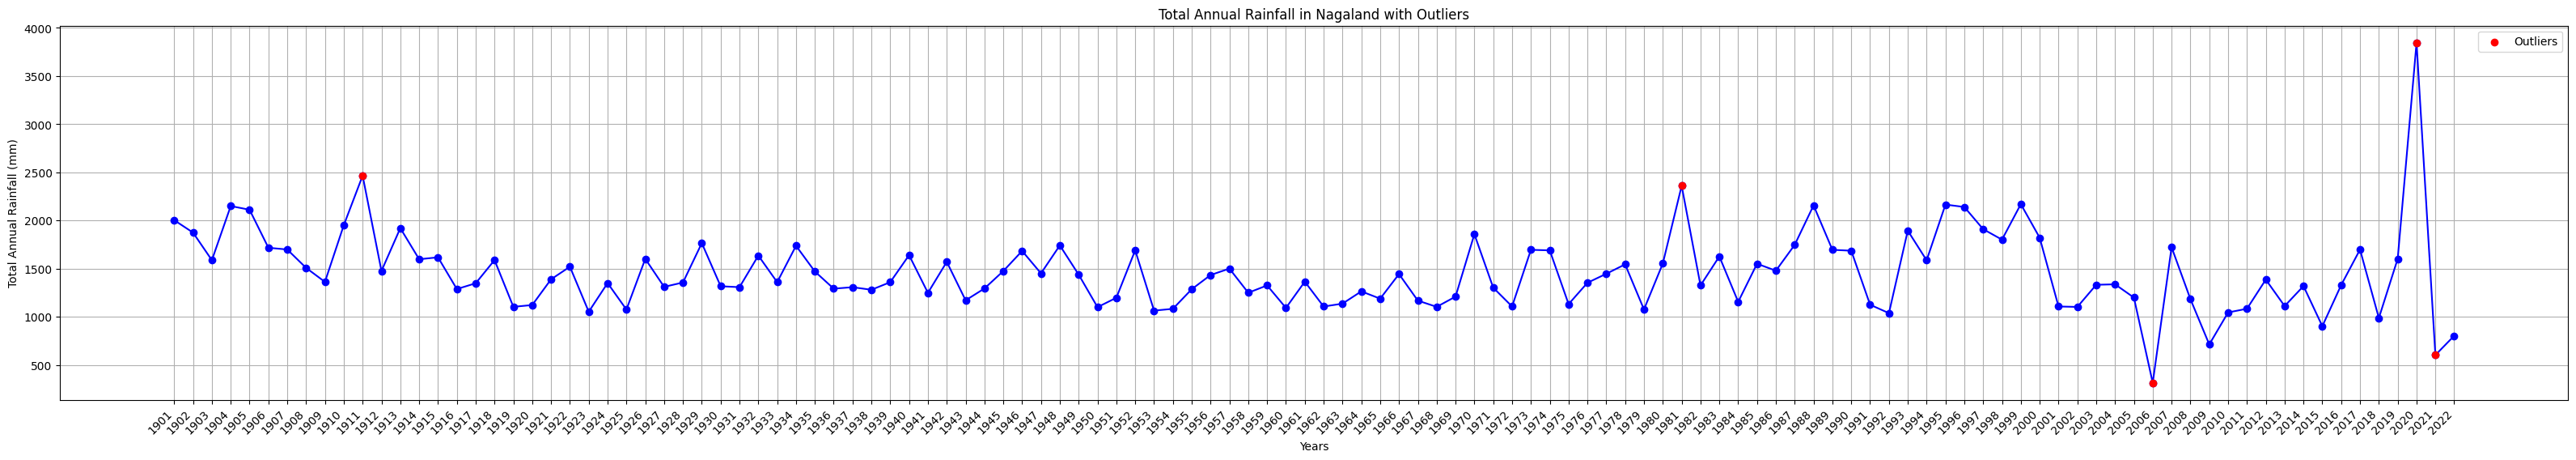

Number of Outliers: 5
Outlier Years: [1911, 1981, 2006, 2020, 2021]
Outlier Values: [2466.0881065130234, 2360.9599198177457, 316.0833272635937, 3846.250558696687, 604.5028332769871]


In [ ]:
# Calculate the Z-scores for the 'Total Annual Rainfall' column
z_scores = zscore(result_df_pivoted['Total Annual Rainfall'])

# Define a threshold for identifying outliers (e.g., Z-score greater than 2)
outlier_threshold = 2

# Identify outlier indices
outlier_indices = np.where(np.abs(z_scores) > outlier_threshold)[0]

# Plot the line graph with outliers highlighted
plt.figure(figsize=(40, 6))
plt.plot(result_df_pivoted['Year'], result_df_pivoted['Total Annual Rainfall'], marker='o', linestyle='-', color='b')
plt.scatter(result_df_pivoted['Year'].iloc[outlier_indices], result_df_pivoted['Total Annual Rainfall'].iloc[outlier_indices], color='r', label='Outliers',  zorder=5)
plt.xlabel('Years')
plt.ylabel('Total Annual Rainfall (mm)')
plt.title('Total Annual Rainfall in Nagaland with Outliers')
plt.xticks(np.arange(min(result_df_pivoted['Year']), max(result_df_pivoted['Year']) + 1, 1), rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()

# Print information about outliers
print(f"Number of Outliers: {len(outlier_indices)}")
print(f"Outlier Years: {result_df_pivoted['Year'].iloc[outlier_indices].tolist()}")
print(f"Outlier Values: {result_df_pivoted['Total Annual Rainfall'].iloc[outlier_indices].tolist()}")

DECADAL AVERAGE ANNUAL RAINFALL 1900 TO 2020

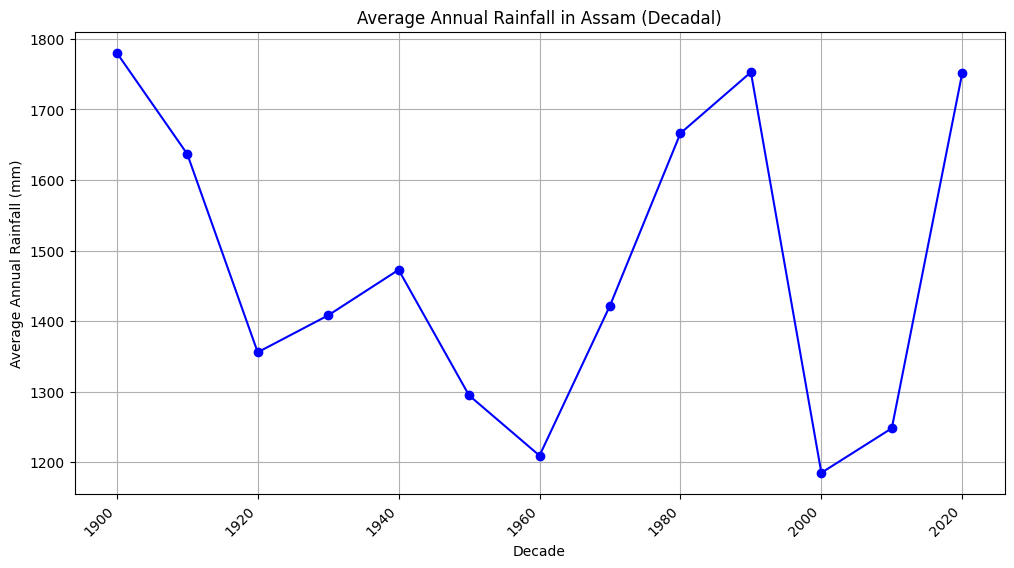

Mean Annual Rainfall: 1475.581608025717 mm
Standard Deviation of Annual Rainfall: 218.05268635884016 mm


In [ ]:
# Calculate average annual rainfall across each 10 years
result_df_pivoted['Decade'] = (result_df_pivoted['Year'] // 10) * 10
decadal_average_rainfall = result_df_pivoted.groupby('Decade')['Total Annual Rainfall'].mean()

# Plot the decadal average annual rainfall as a line plot
plt.figure(figsize=(12, 6))
plt.plot(decadal_average_rainfall.index, decadal_average_rainfall, marker='o', color='b', linestyle='-')
plt.xlabel('Decade')
plt.ylabel('Average Annual Rainfall (mm)')
plt.title(f'Average Annual Rainfall in Nagaland (Decadal)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Print the mean and standard deviation
mean_rainfall = decadal_average_rainfall.mean()
std_rainfall = decadal_average_rainfall.std()

print(f"Mean Annual Rainfall: {mean_rainfall} mm")
print(f"Standard Deviation of Annual Rainfall: {std_rainfall} mm")

YEARS WITH AVERAGE ANNUAL RAINFALL ABOVE 95TH PERCENTILE AND BELOW 5TH PERCENTILE

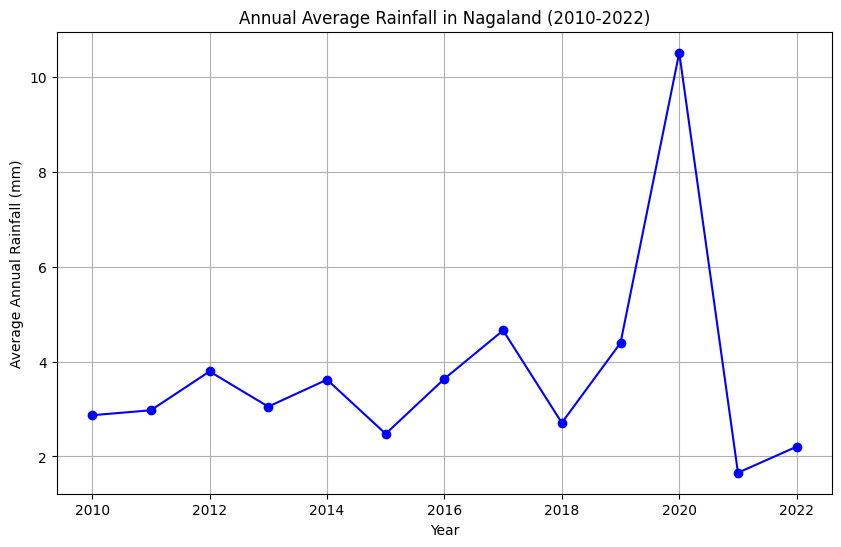

Years above 95th percentile: [2020]
Years below 5th percentile: [2021]


In [ ]:
# Initialize an empty list to store annual average rainfall
annual_averages = []

# Loop through each year in the specified range (2010 to 2022)
for year in range(2010, 2023):
    # Load the rainfall data for the current year
    rainfall_data = xr.open_dataset(data_path + f'{year}.nc')

    # Find latitude and longitude indices within Nagaland's boundaries
    latitude_indices = np.where((rainfall_data['LATITUDE'] >= min_latitude) & (rainfall_data['LATITUDE'] <= max_latitude))[0]
    longitude_indices = np.where((rainfall_data['LONGITUDE'] >= min_longitude) & (rainfall_data['LONGITUDE'] <= max_longitude))[0]

    # Slice the rainfall data for Nagaland
    Nagaland_rainfall_data = rainfall_data['RAINFALL'][:, latitude_indices, longitude_indices]

    # Calculate the annual average rainfall
    annual_average_rainfall = Nagaland_rainfall_data.mean(dim='TIME').sum().item()
    annual_averages.append(annual_average_rainfall)

    # Close the NetCDF dataset to free up resources
    rainfall_data.close()

# Plot the annual average rainfall
plt.figure(figsize=(10, 6))
plt.plot(range(2010, 2023), annual_averages, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Average Annual Rainfall (mm)')
plt.title('Annual Average Rainfall in Nagaland (2010-2022)')
plt.grid(True)
plt.show()

# Calculate percentiles
percentile_5 = np.percentile(annual_averages, 5)
percentile_95 = np.percentile(annual_averages, 95)

# Print years above 95th percentile
above_95 = [year for year, avg in zip(range(2010, 2023), annual_averages) if avg > percentile_95]
print(f'Years above 95th percentile: {above_95}')

# Print years below 5th percentile
below_5 = [year for year, avg in zip(range(2010, 2023), annual_averages) if avg < percentile_5]
print(f'Years below 5th percentile: {below_5}')

MONTHLY RAINFALL ANALYSIS FROM 1901 TO 2022

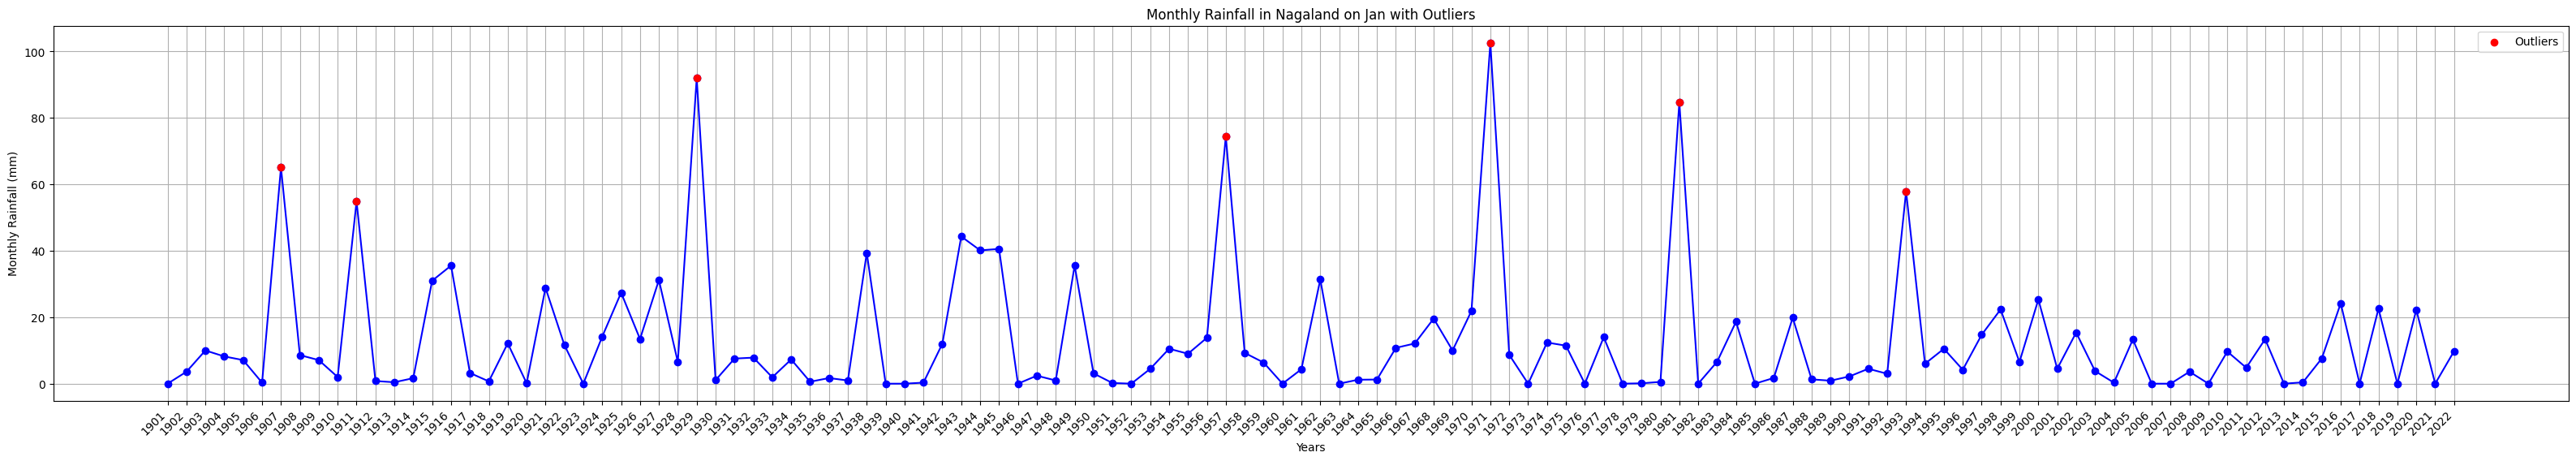

Number of Outliers: 7
Outlier Years: [1907, 1911, 1929, 1957, 1971, 1981, 1993]
Outlier Values: [65.08986973762512, 54.89365270733833, 91.94629430770874, 74.38739484548569, 102.61564338207245, 84.66486477851868, 57.89534366130829]


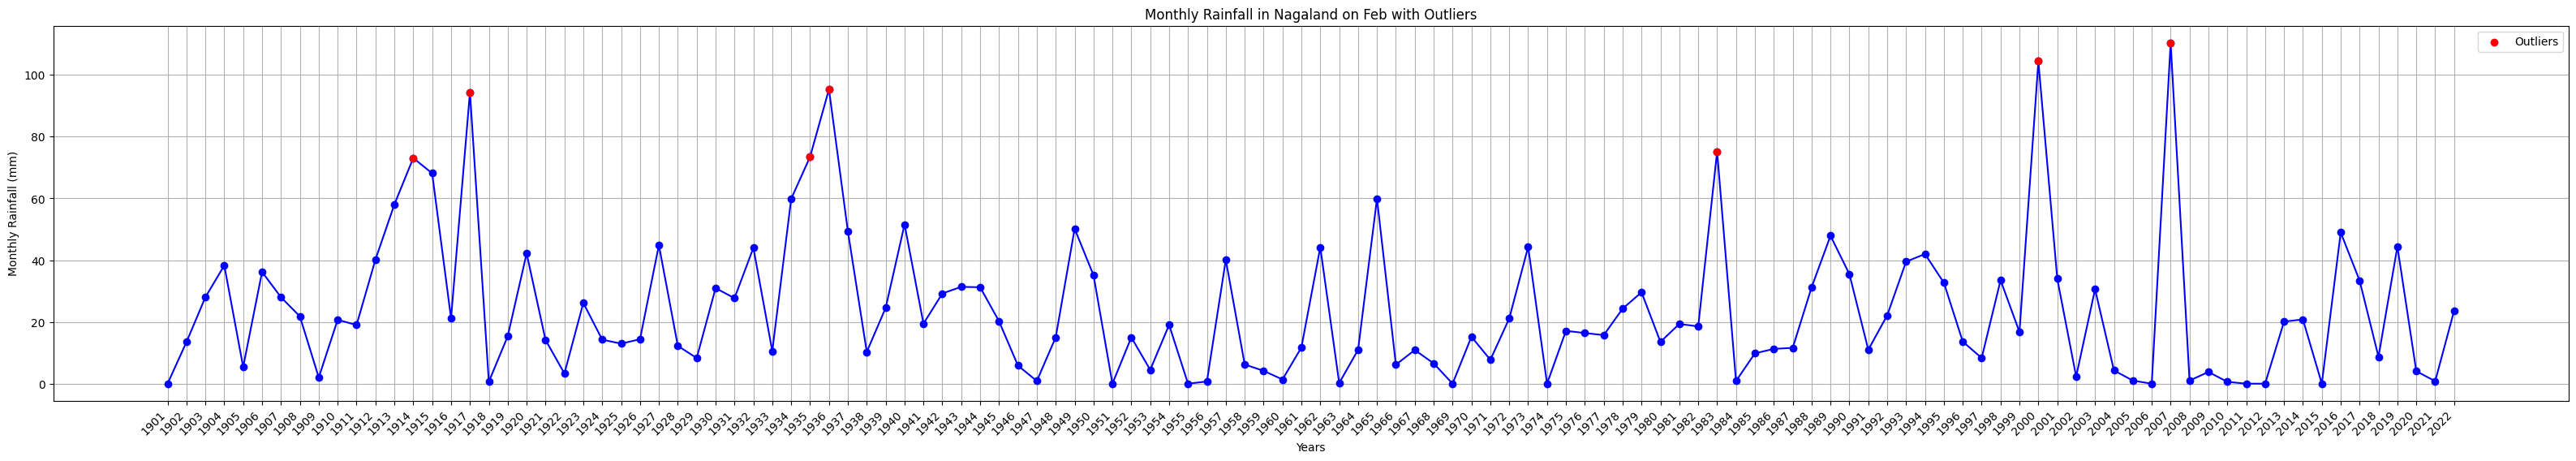

Number of Outliers: 7
Outlier Years: [1914, 1917, 1935, 1936, 1983, 2000, 2007]
Outlier Values: [73.07336974143982, 94.40135139226913, 73.4837149232626, 95.3334532380104, 75.18176935613155, 104.42503301799297, 110.40000182390213]


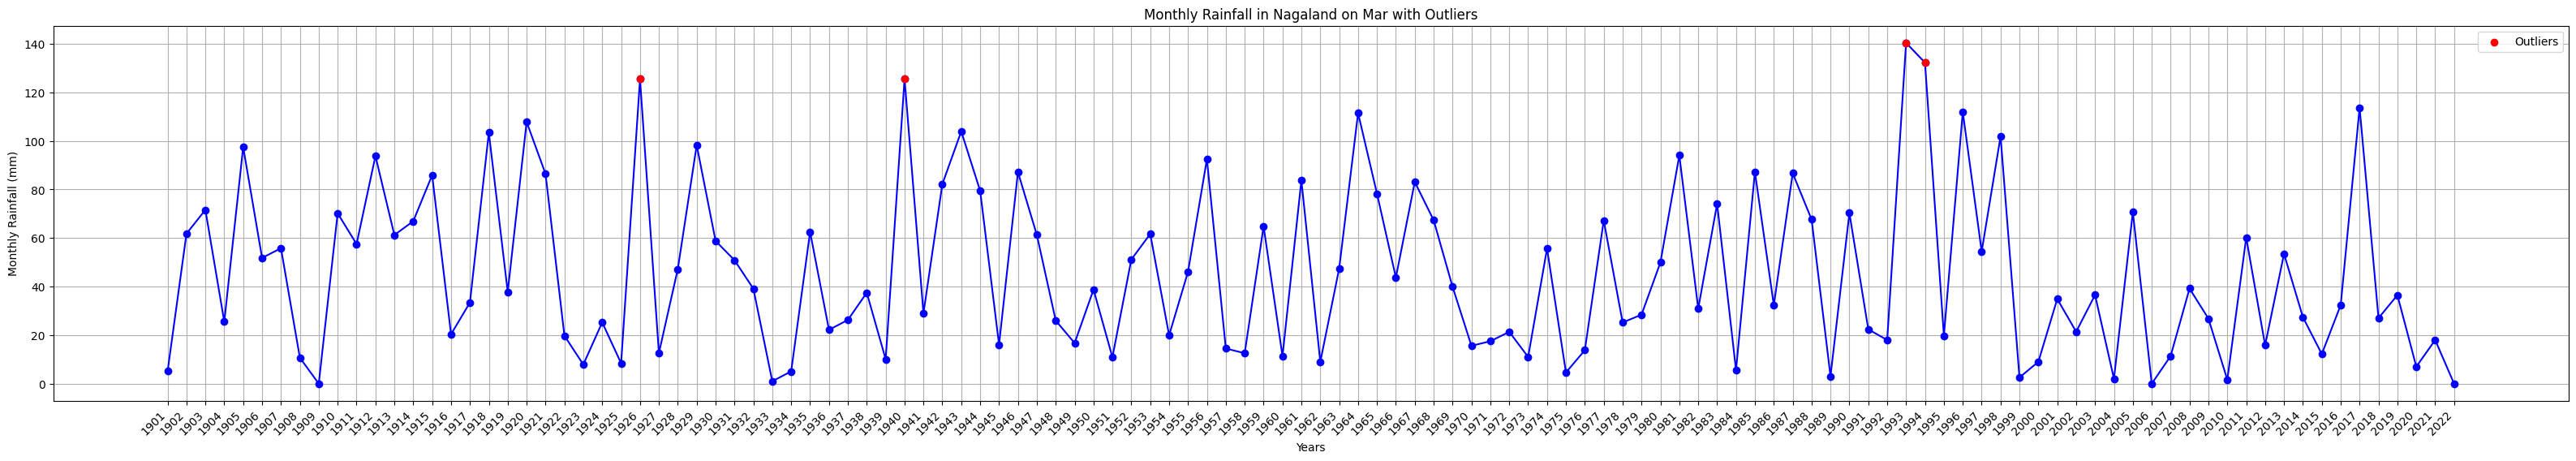

Number of Outliers: 4
Outlier Years: [1926, 1940, 1993, 1994]
Outlier Values: [125.49747639149427, 125.5745315849781, 140.42110633850098, 132.23837852478027]


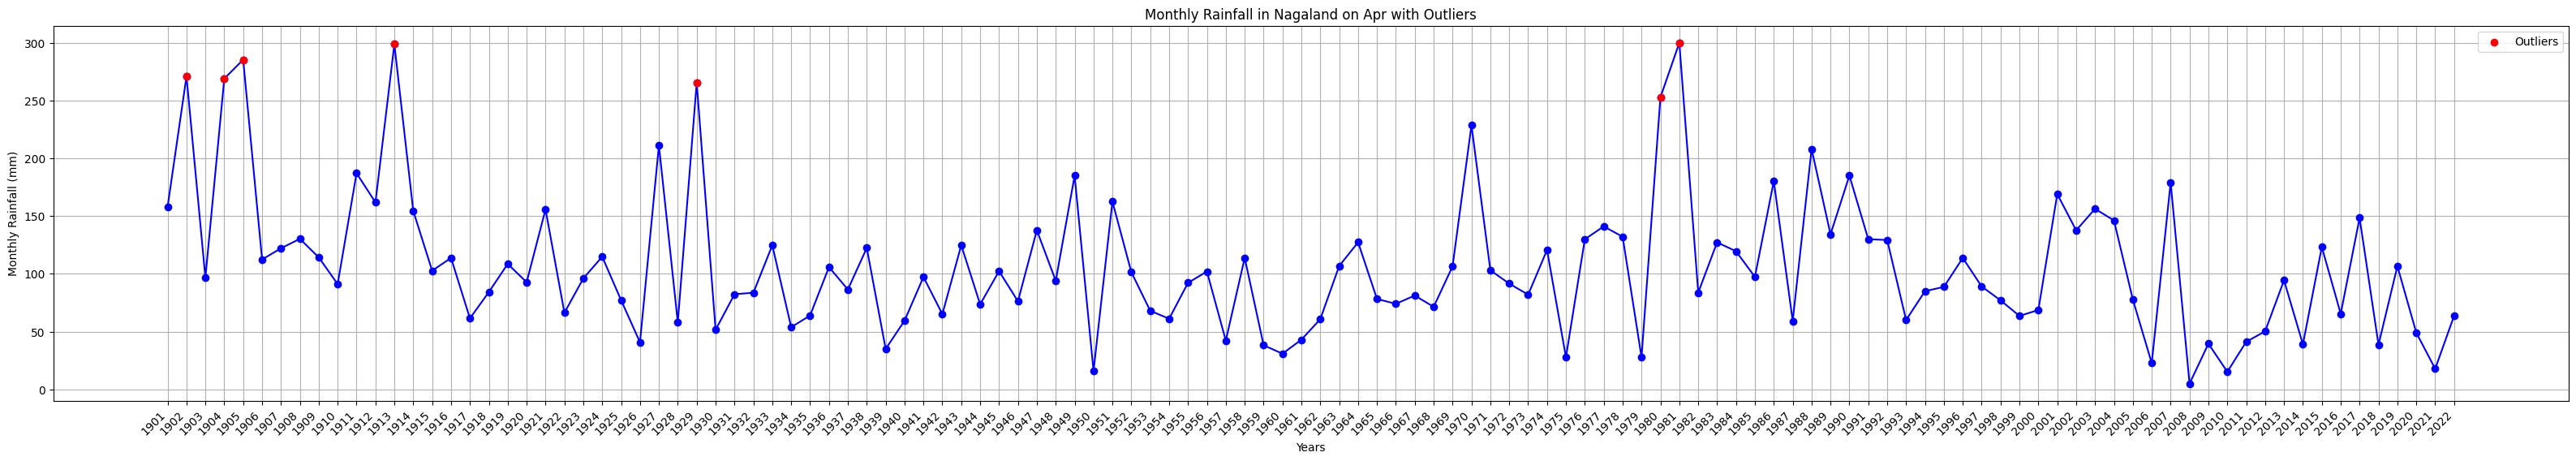

Number of Outliers: 7
Outlier Years: [1902, 1904, 1905, 1913, 1929, 1980, 1981]
Outlier Values: [270.8955308794975, 268.9971201121807, 285.3727155327797, 298.7677545249462, 265.5125962793827, 252.8073635995388, 300.0002683997154]


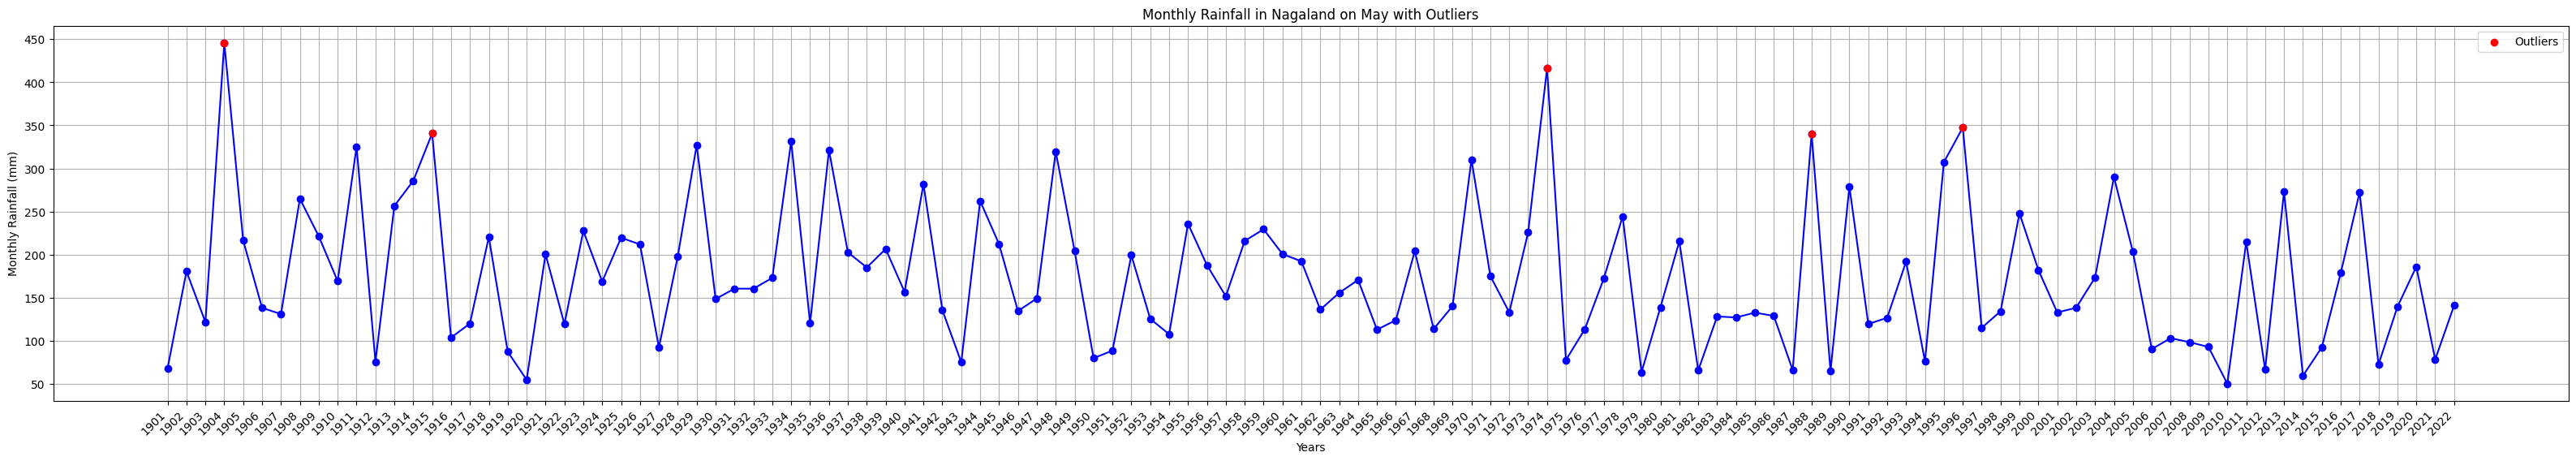

Number of Outliers: 5
Outlier Years: [1904, 1915, 1974, 1988, 1996]
Outlier Values: [445.8762429654598, 340.74302995204926, 416.25873535871506, 340.2996515035629, 347.46455496549606]


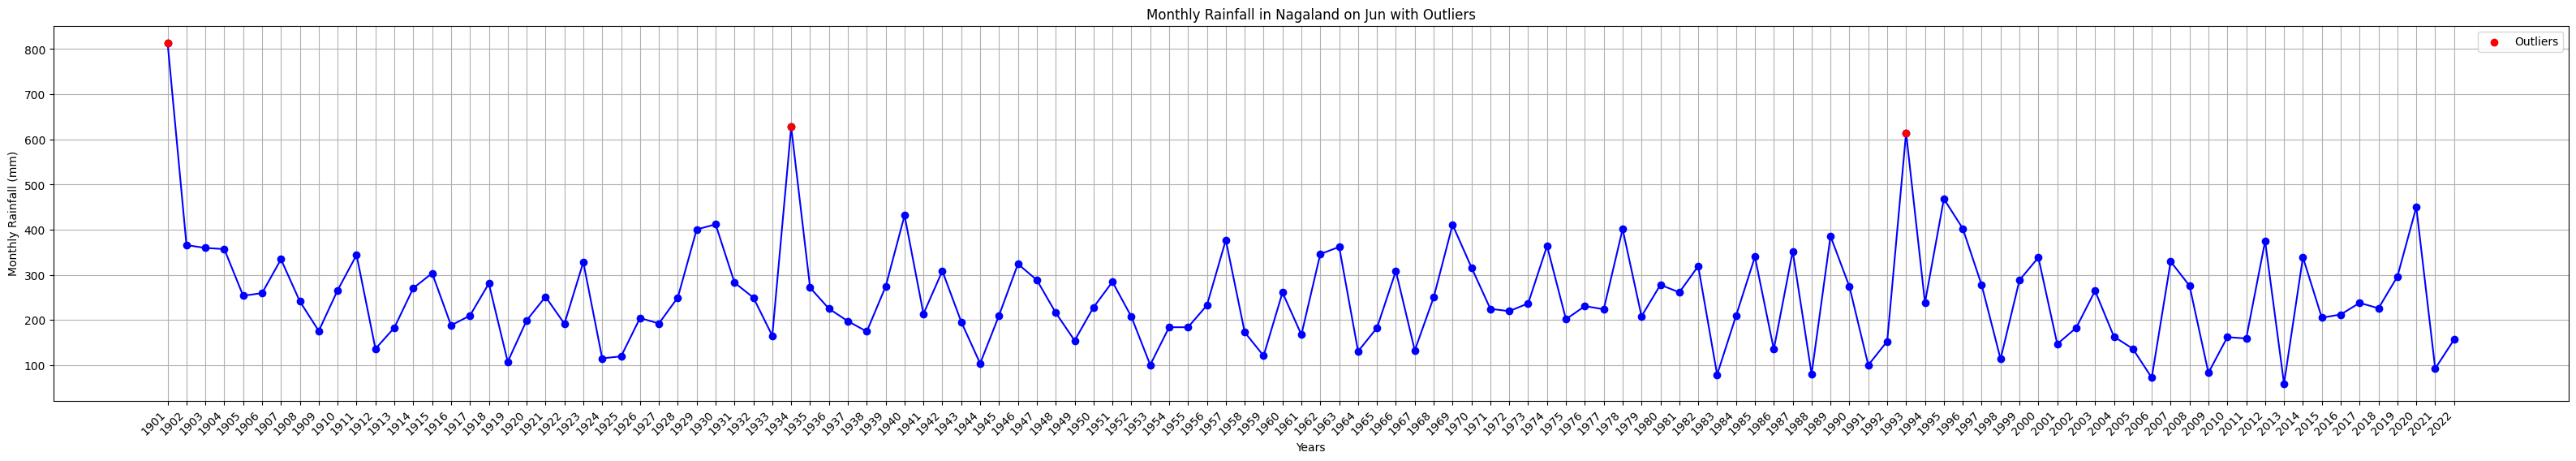

Number of Outliers: 3
Outlier Years: [1901, 1934, 1993]
Outlier Values: [813.899974822998, 627.5675264447927, 614.7999740242958]


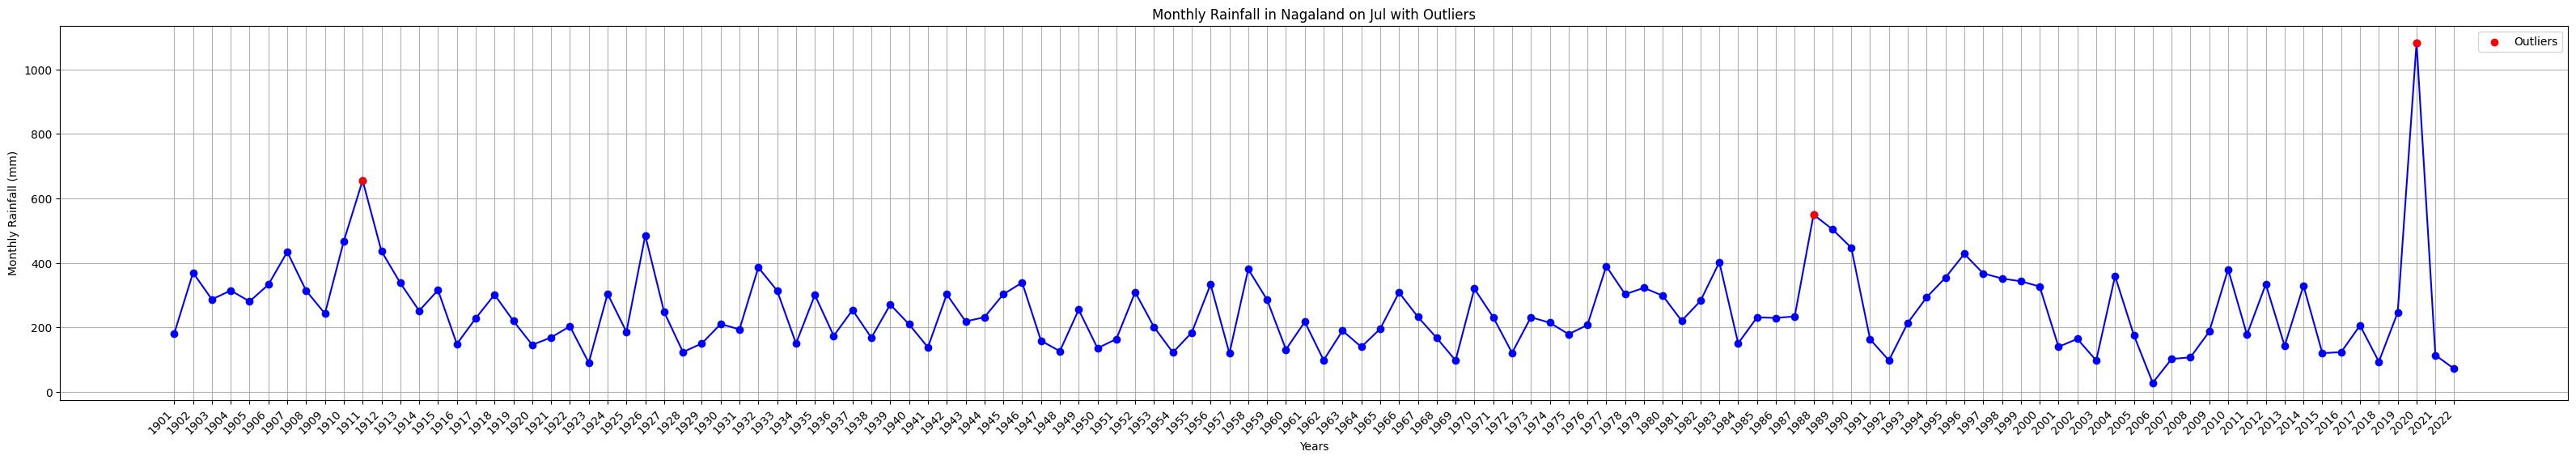

Number of Outliers: 3
Outlier Years: [1911, 1988, 2020]
Outlier Values: [655.5442355275154, 549.4794697761536, 1082.6987986564636]


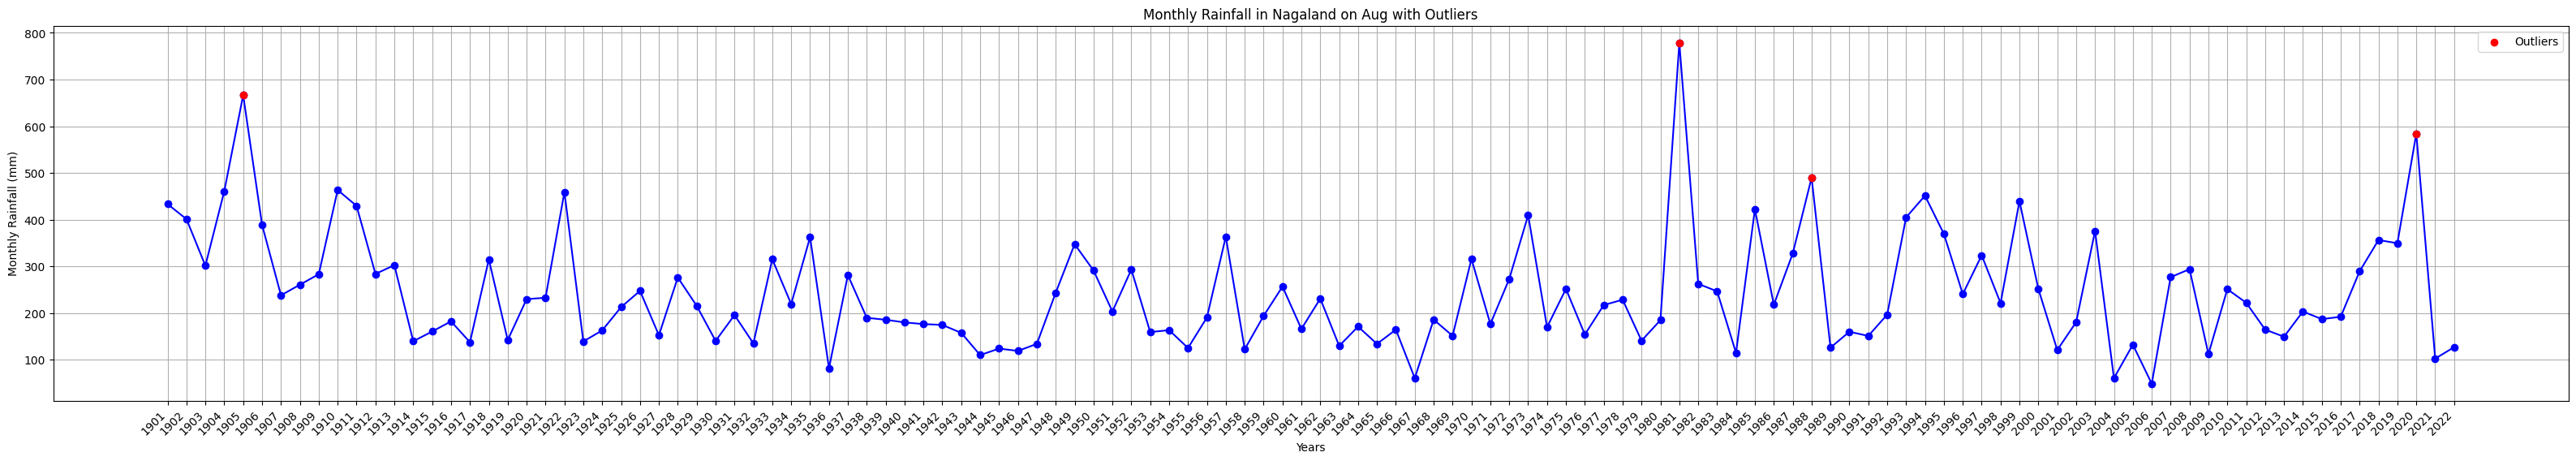

Number of Outliers: 4
Outlier Years: [1905, 1981, 1988, 2020]
Outlier Values: [666.7235852777958, 778.6978195905685, 489.8521453291178, 584.2315846681595]


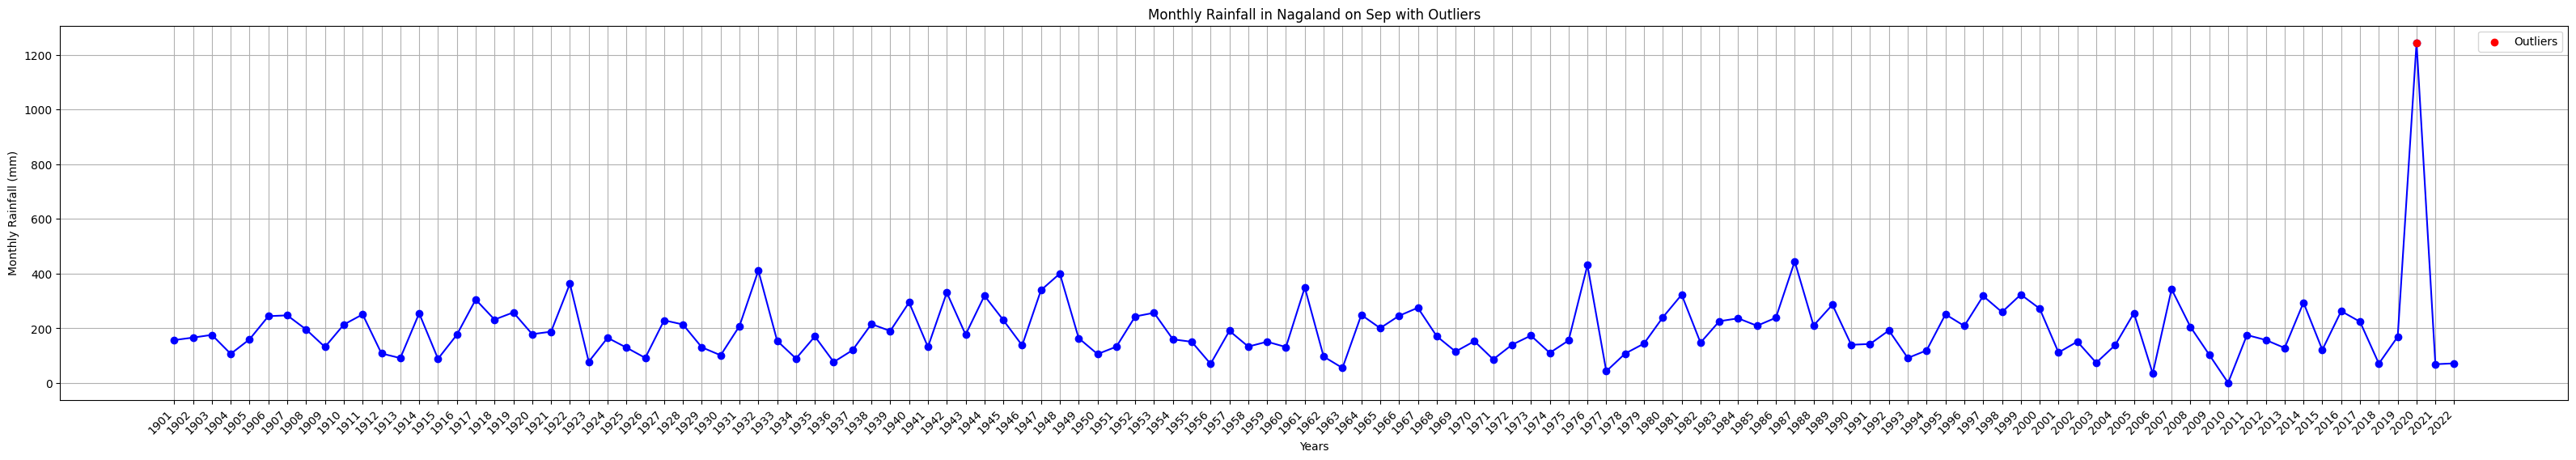

Number of Outliers: 1
Outlier Years: [2020]
Outlier Values: [1244.2435961440206]


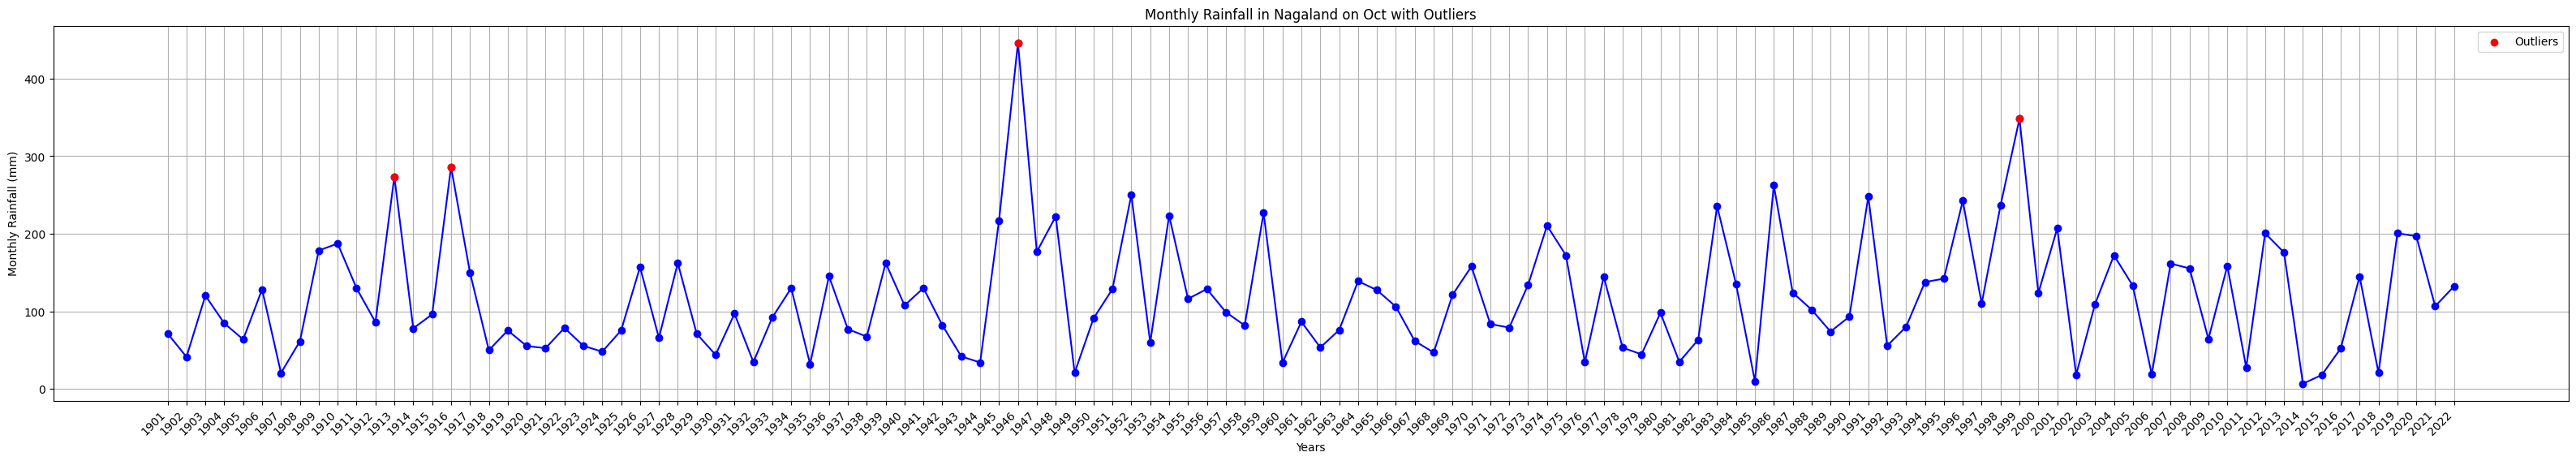

Number of Outliers: 4
Outlier Years: [1913, 1916, 1946, 1999]
Outlier Values: [273.67080068588257, 286.26178604364395, 446.2021441757679, 348.15286552906036]


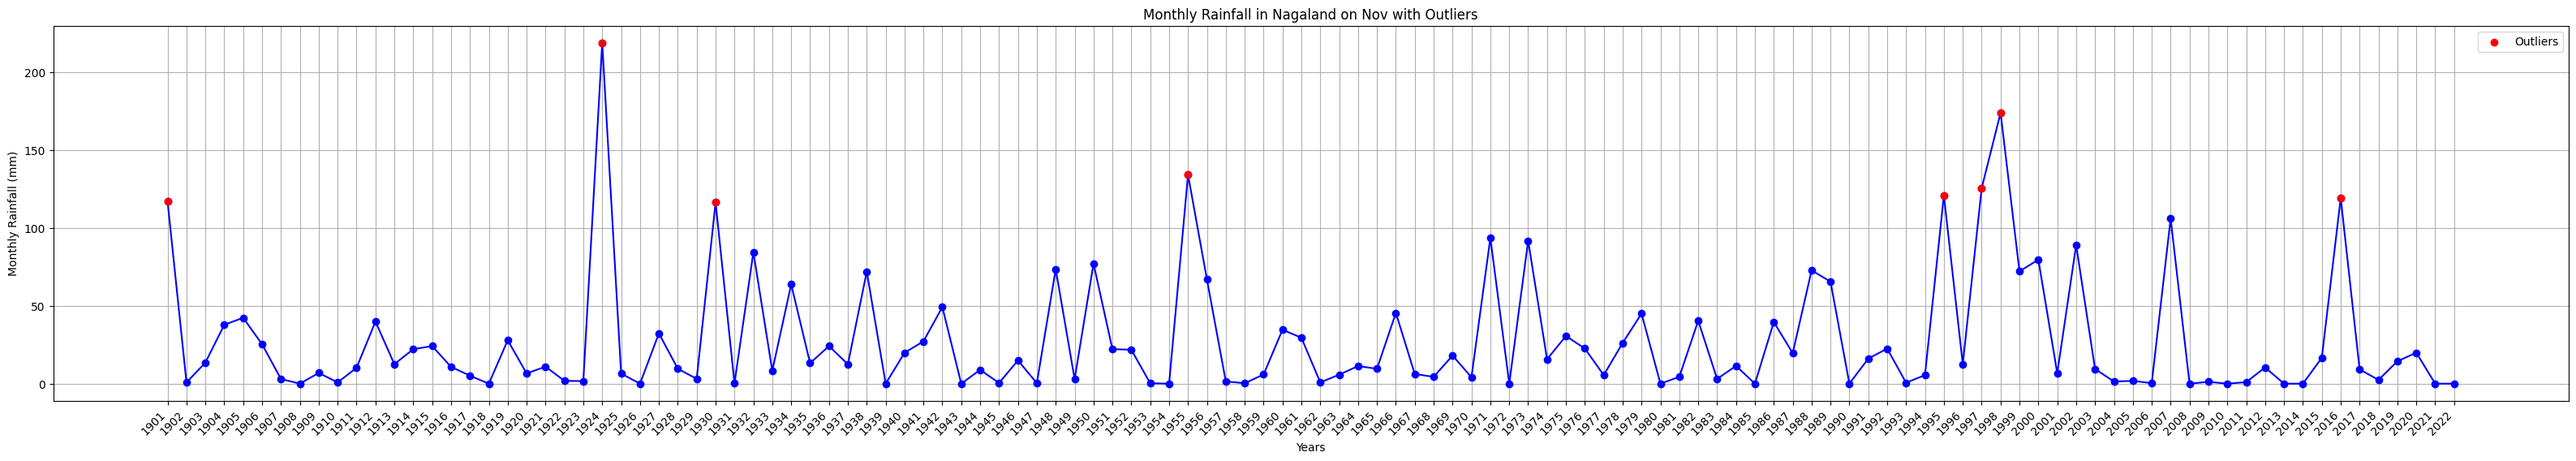

Number of Outliers: 8
Outlier Years: [1901, 1924, 1930, 1955, 1995, 1997, 1998, 2016]
Outlier Values: [116.78788539767265, 218.75003004074097, 116.27170872688293, 134.10138583183289, 120.81509937345982, 125.4097129702568, 173.79161596298218, 119.12717056274414]


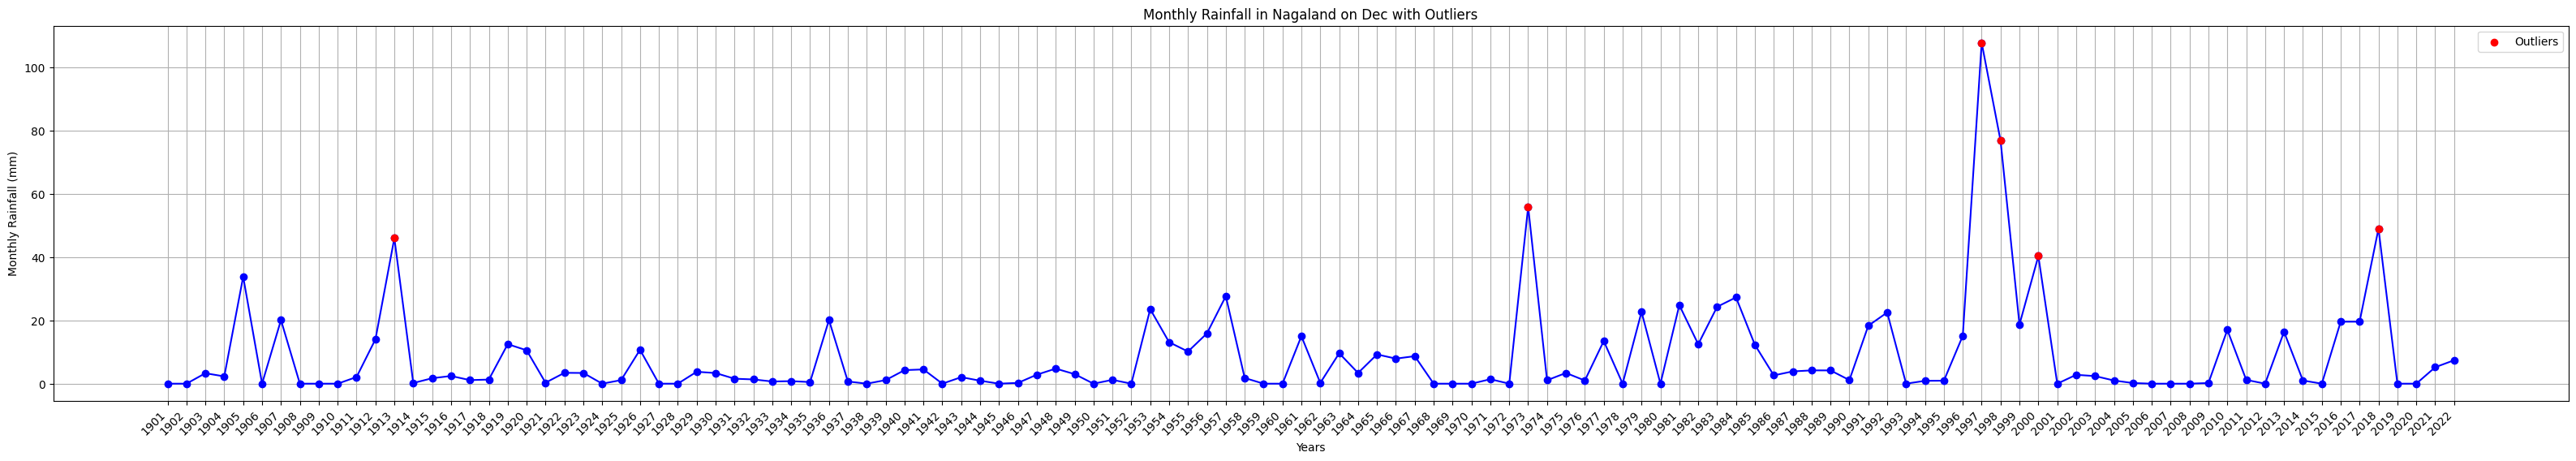

Number of Outliers: 6
Outlier Years: [1913, 1973, 1997, 1998, 2000, 2018]
Outlier Values: [45.99230778217316, 55.87765312194824, 107.71100897341967, 76.73689037561417, 40.32678687572479, 48.98493003845215]


In [ ]:
for month in months:
  # Calculate the Z-scores for the 'month' column
  z_scores = zscore(result_df_pivoted[month])

  # Define a threshold for identifying outliers (e.g., Z-score greater than 2)
  outlier_threshold = 2

  # Identify outlier indices
  outlier_indices = np.where(np.abs(z_scores) > outlier_threshold)[0]

  # Plot the line graph with outliers highlighted
  plt.figure(figsize=(40, 6))
  plt.plot(result_df_pivoted['Year'], result_df_pivoted[month], marker='o', linestyle='-', color='b')
  plt.scatter(result_df_pivoted['Year'].iloc[outlier_indices], result_df_pivoted[month].iloc[outlier_indices], color='r', label='Outliers',  zorder=5)
  plt.xlabel('Years')
  plt.ylabel('Monthly Rainfall (mm)')
  plt.title(f'Monthly Rainfall in Nagaland on {month} with Outliers')
  plt.xticks(np.arange(min(result_df_pivoted['Year']), max(result_df_pivoted['Year']) + 1, 1), rotation=45, ha='right')
  plt.legend()
  plt.grid(True)
  plt.show()

  # Print information about outliers
  print(f"Number of Outliers: {len(outlier_indices)}")
  print(f"Outlier Years: {result_df_pivoted['Year'].iloc[outlier_indices].tolist()}")
  print(f"Outlier Values: {result_df_pivoted[month].iloc[outlier_indices].tolist()}")


MANN-KENDALL TEST AND SEN SLOPE ESTIMATOR FOR TREND ANALYSIS.
##### Mann-Kendall test : A non-parametric statistical test used to assess the presence of trends in time series data by evaluating the monotonicity of the data over time.

##### Sen Slope Estimator : A method for estimating the slope of a trend in time series data

In [ ]:
# Filter the DataFrame for the desired years (2022 to 2012)
print("Enter the range of years(year1 to year2)")
year1 = int(input())
year2 = int(input())
selected_years = range(year1, year2 + 1)
df_selected_years = result_df_pivoted[result_df_pivoted['Year'].isin(selected_years)]

result, _ = kendalltau(df_selected_years['Year'],df_selected_years['Total Annual Rainfall'])

# Calculate p-value for the Mann-Kendall test
p_value = 2 * norm.cdf(-abs(result))

result_s = linregress(df_selected_years['Year'], df_selected_years['Total Annual Rainfall'])

# Display Mann-Kendall test result
print(f"Mann-Kendall Test Result for Yearly Sum of Rainfall ({year1} to {year2}):")
#print(f"Kendall's Tau: {result}")
print(f"P-value: {p_value}")

# Display Theil-Sen estimator result
print(f"Theil-Sen Estimator Result for Yearly Sum of Rainfall ({year1} to {year2}):")
print(f"Slope (Sen's Slope): {result_s.slope}")

if p_value < 0.05:
    if result_s.slope > 0:
        print("Significant positive trend")
    elif result_s.scope < 0:
        print("Significant negative trend")
    else:
        print("No significant trend")
else:
    print("No significant trend")

Enter the range of years(year1 to year2)
2020
2022
Mann-Kendall Test Result for Yearly Sum of Rainfall (2020 to 2022):
P-value: 0.7388826803635272
Theil-Sen Estimator Result for Yearly Sum of Rainfall (2020 to 2022):
Slope (Sen's Slope): -1520.6769141368568
No significant trend


In [ ]:
# Filter the DataFrame for the desired years (2022 to 2012)
print("Enter the range of years(year1 to year2)")
year1 = int(input())
year2 = int(input())
selected_years = range(year1, year2 + 1)
df_selected_years = result_df_pivoted[result_df_pivoted['Year'].isin(selected_years)]

result, _ = kendalltau(df_selected_years['Year'],df_selected_years['Dec'])

# Calculate p-value for the Mann-Kendall test
p_value = 2 * norm.cdf(-abs(result))

result_s = linregress(df_selected_years['Year'], df_selected_years['Dec'])

# Display Mann-Kendall test result
print(f"Mann-Kendall Test Result for Monthly Rainfall of January ({year1} to {year2}):")
#print(f"Kendall's Tau: {result}")
print(f"P-value: {p_value}")

# Display Theil-Sen estimator result
print(f"Theil-Sen Estimator Result for Monthly Rainfall of January ({year1} to {year2}):")
print(f"Slope (Sen's Slope): {result_s.slope}")

if p_value < 0.05:
    if result_s.slope > 0:
        print("Significant positive trend")
    elif result_s.scope < 0:
        print("Significant negative trend")
    else:
        print("No significant trend")
else:
    print("No significant trend")

Enter the range of years(year1 to year2)
2020
2022
Mann-Kendall Test Result for Monthly Rainfall of January (2020 to 2022):
P-value: 0.31731050786291415
Theil-Sen Estimator Result for Monthly Rainfall of January (2020 to 2022):
Slope (Sen's Slope): 3.697733879089355
No significant trend


PETTITT TEST
##### A non-parametric statistical test used to detect a change point or discontinuity in a time series, indicating a significant shift in the distribution of the data.

In [ ]:
# Filter the DataFrame for the desired years (2022 to 2012)
print("Enter the range of years (year1 to year2)")
year1 = int(input())
year2 = int(input())
selected_years = range(year1, year2 + 1)
df_selected_years = result_df_pivoted[result_df_pivoted['Year'].isin(selected_years)]

# Perform Pettitt test for the selected years
result_pettitt = hg.pettitt_test(df_selected_years['Total Annual Rainfall'])

# Display Pettitt test result
print(f"Pettitt Test Result for Yearly Sum of Rainfall ({year1} to {year2}):")
print(f"Change detected: {result_pettitt.h}")
print(f"Change point index: {result_pettitt.cp}")
print(f"P-value: {result_pettitt.p}")
print(f"Test Statistic (U): {result_pettitt.U}")
print(f"Mean Before Change (mu1): {result_pettitt.avg.mu1}")
print(f"Mean After Change (mu2): {result_pettitt.avg.mu2}")

Enter the range of years (year1 to year2)
2020
2022
Pettitt Test Result for Yearly Sum of Rainfall (2020 to 2022):
Change detected: True
Change point index: 1
P-value: 0.0
Test Statistic (U): 2.0
Mean Before Change (mu1): 3846.250558696687
Mean After Change (mu2): 704.6997818499804


In [ ]:
# Filter the DataFrame for the desired years (2022 to 2012)
print("Enter the range of years (year1 to year2)")
year1 = int(input())
year2 = int(input())
selected_years = range(year1, year2 + 1)
df_selected_years = result_df_pivoted[result_df_pivoted['Year'].isin(selected_years)]

# Perform Pettitt test for the selected years
result_pettitt = hg.pettitt_test(df_selected_years['Jan'])

# Display Pettitt test result
print(f"Pettitt Test Result for Monthly Rainfall of January ({year1} to {year2}):")
print(f"Change detected: {result_pettitt.h}")
print(f"Change point index: {result_pettitt.cp}")
print(f"P-value: {result_pettitt.p}")
print(f"Test Statistic (U): {result_pettitt.U}")
print(f"Mean Before Change (mu1): {result_pettitt.avg.mu1}")
print(f"Mean After Change (mu2): {result_pettitt.avg.mu2}")

Enter the range of years (year1 to year2)
2021
2022
Pettitt Test Result for Monthly Rainfall of January (2021 to 2022):
Change detected: True
Change point index: 1
P-value: 0.0
Test Statistic (U): 1.0
Mean Before Change (mu1): 0.0
Mean After Change (mu2): 9.804165840148926
